In [30]:
# Read the MELD (Multimodal EmotionLines Dataset)

import pandas as pd

dataFilePath = "s3://n1p1/test_sent_emo.csv"
df = pd.read_csv(dataFilePath)
#print(df)
df.head()

Sr No.                                          Utterance Speaker  \
0       1  Why do all you’re coffee mugs have numbers on ...    Mark   
1       2  Oh. That’s so Monica can keep track. That way ...  Rachel   
2       3                                       Y'know what?  Rachel   
3      19                     Come on, Lydia, you can do it.    Joey   
4      20                                              Push!    Joey   

    Emotion Sentiment  Dialogue_ID  Utterance_ID  Season  Episode  \
0  surprise  positive            0             0       3       19   
1     anger  negative            0             1       3       19   
2   neutral   neutral            0             2       3       19   
3   neutral   neutral            1             0       1       23   
4       joy  positive            1             1       1       23   

      StartTime       EndTime  
0  00:14:38,127  00:14:40,378  
1  00:14:40,629  00:14:47,385  
2  00:14:56,353  00:14:57,520  
3   0:10:44,769   0:10:46,146  
4   0:10:46,146   0:10:46,833

In [31]:
# Get the stats of Sentiment in current dataSet

# Imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
# Product Scores
fig = px.pie(df, 
             labels='Sentiment', 
             names='Sentiment', 
             color_discrete_map={'neutral':'lightcyan',
                                 'negative':'cyan',
                                 'positive':'royalblue'})
fig.update_traces(textposition='inside', textinfo='percent+label',pull=[0, 0, 0.2, 0])
fig.update_layout(title_text='Sentiment value statistics')
fig.show()

In [32]:
# Get the stats of Emotions in current dataSet

# Imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

# Product Scores
fig = px.histogram(df, 
             x="Emotion", 
             color='Emotion',
             labels={'count':'Count of Emotion'}, 
             #histnorm='count of Emotion',
             hover_data=['Emotion'])
fig.update_layout(title_text='Emotions value statistics')
fig.show()

In [33]:
# create some wordclouds to see the most frequently used words in the Utterances using 
# NLTK - Natural Language Toolkit (http://www.nltk.org/)
!pip install wordcloud


In [34]:
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

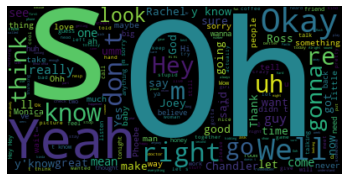

In [35]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(sentence for sentence in df.Utterance)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [37]:
# Splitting the dataset into train and test set for SENTIMENT analysis
data = df[['Utterance','Sentiment']]
train, test = train_test_split(data,test_size = 0.1)

# Removing neutral sentiments
train = train[train.Sentiment != "neutral"]
train.head()

Utterance Sentiment
1540  Look, it’s not that easy. She said she wanted ...  negative
2115  I don’t care which pot is regular and which po...  negative
99    Two very good points, look I’ve known you both...  negative
753                                       Damn you 15s!  negative
1081  With a mahogany sleigh bed and bedside tables ...  positive

Positive words


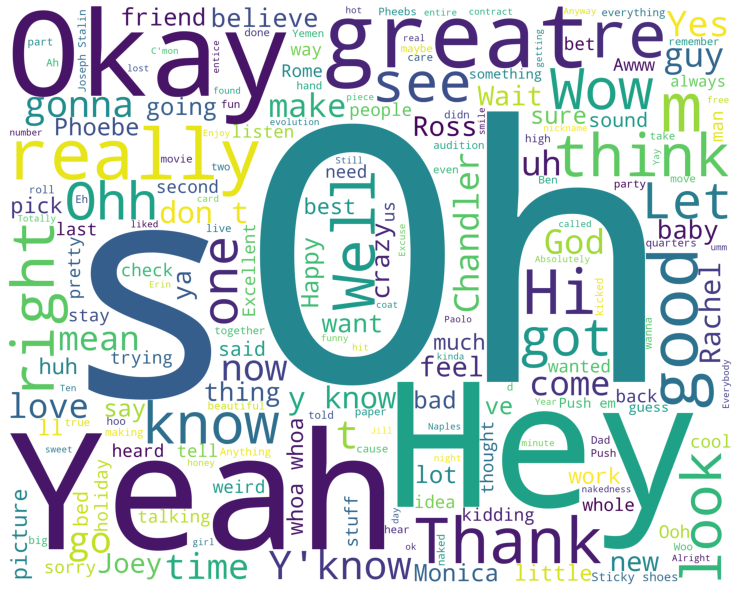

Negative words


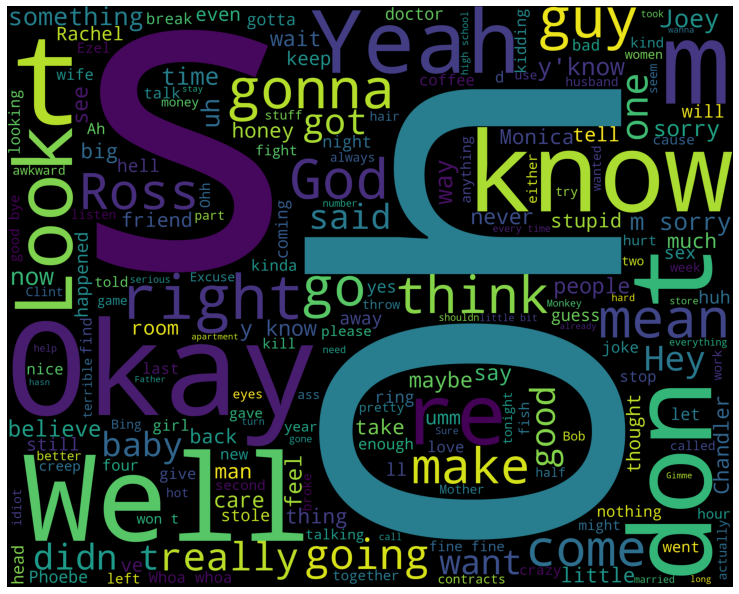

In [38]:
#Separate the Positive and Negative Utterances of the training set in order to easily visualize their contained words
train_pos = train[ train['Sentiment'] == 'positive']
train_pos = train_pos['Utterance']
train_neg = train[ train['Sentiment'] == 'negative']
train_neg = train_neg['Utterance']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [39]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
# remove the hashtags, mentions, links and stopwords from the training set
# Stop Words are words which do not contain important significance to be used in Search Queries.
# Usually these words are filtered out from search queries because they return vast amount of unnecessary information.
# ( the, for, this etc. )
sentences = []
#stopwords = set(STOPWORDS)
#stopwords.update(["br", "href"])
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.Utterance.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    sentences.append((words_without_stopwords, row.Sentiment))

test_pos = test[ test['Sentiment'] == 'positive']
test_pos = test_pos['Utterance']
test_neg = test[ test['Sentiment'] == 'negative']
test_neg = test_neg['Utterance']

In [41]:
# extract the so called features with nltk lib, 
# first by measuring a frequent distribution and by selecting the resulting keys
# Extracting word features
def get_words_in_sentences(sentences):
    all = []
    for (words, Sentiment) in sentences:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_sentences(sentences))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

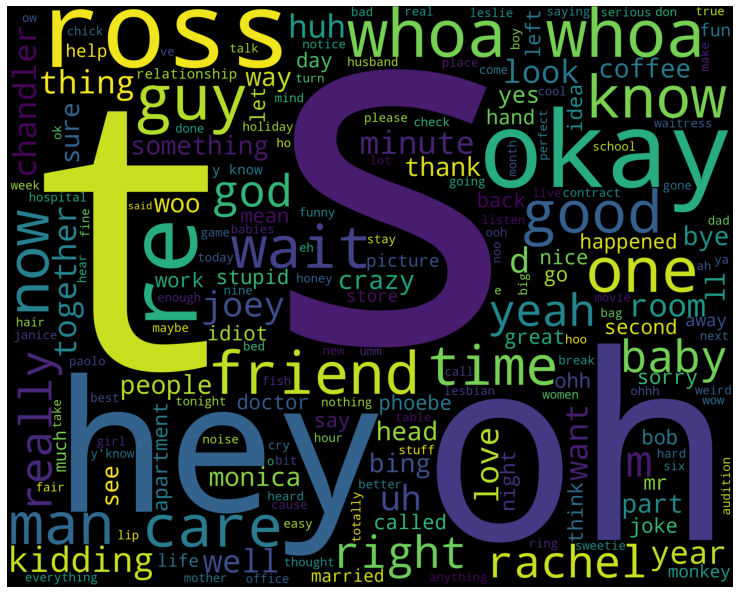

In [42]:
# plot the most frequently distributed words. The most words are centered around debate nights
wordcloud_draw(w_features)

In [43]:
# Using the nltk NaiveBayes Classifier extract the sentance word features
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,sentences)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [44]:
# Finally, with not-so-intelligent metrics, this is a try to measure how the classifier algorithm scored
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'negative'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))    

[Negative]: 80/71 
[Positive]: 49/11 


In [45]:
#Print negative Uterances for quick review
#print(test_neg)
test_neg.head()

315               Oh my God! You’re a 30 year old virgin!
1611    I wanna see what’s in your hand. I wanna see t...
794           I can’t believe I’m going to lose this job!
1679    Y’know what Tag, if we went down to the office...
723                              Well he made Rachel cry!
Name: Utterance, dtype: object

In [46]:
# Splitting the dataset into train and test set for EMOTION analysis
data_emo = df[['Utterance','Emotion']]
train_emo, test_emo = train_test_split(data_emo,test_size = 0.1)
# Removing neutral emotions
train_emo = train_emo[train_emo.Emotion != "neutral"]
train_emo.head()

Utterance  Emotion
2434                                            Is not.    anger
342                      But what does that gonna do...    anger
9                                                 Push!      joy
948                                                Ugh!  disgust
537   Yeah, but what if it's not? What if there    i...     fear

Joy Emotion words


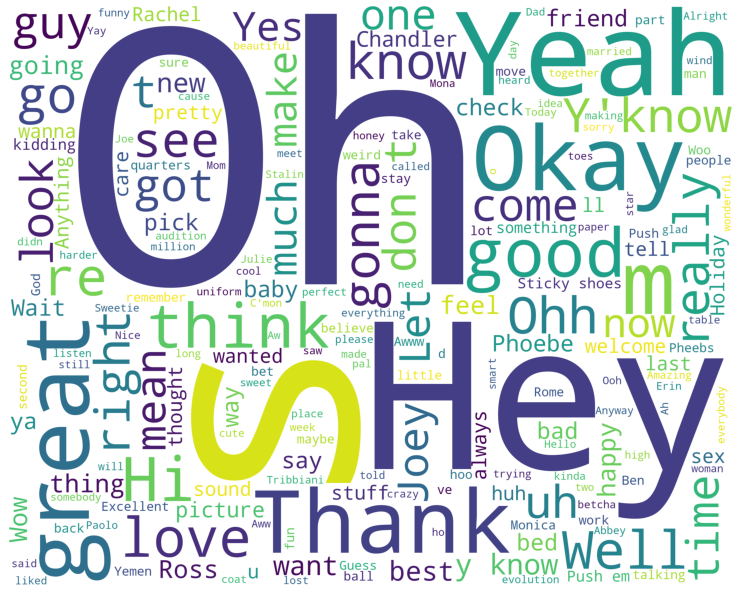

Sadness Emotion words


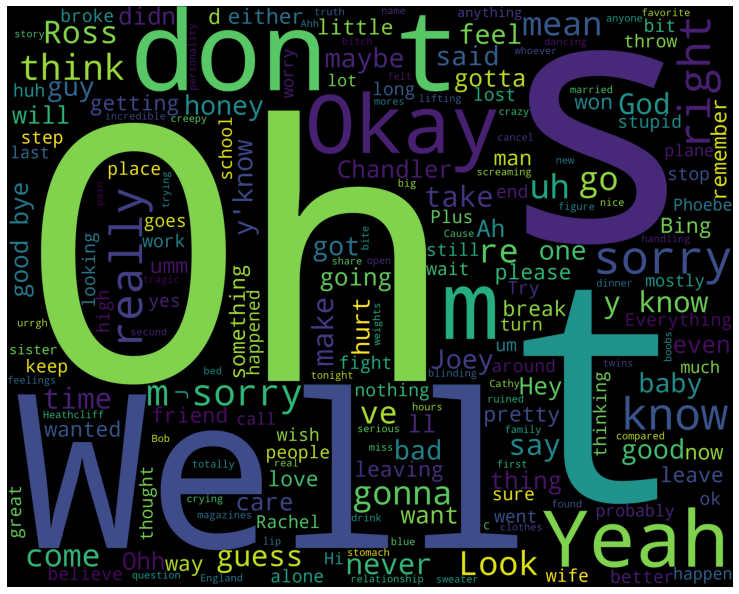

Surprise Emotion words


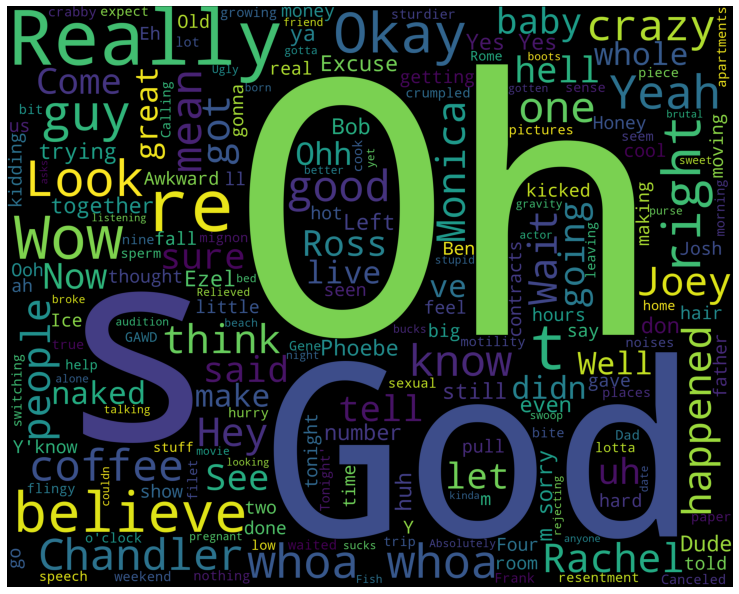

Anger Emotion words


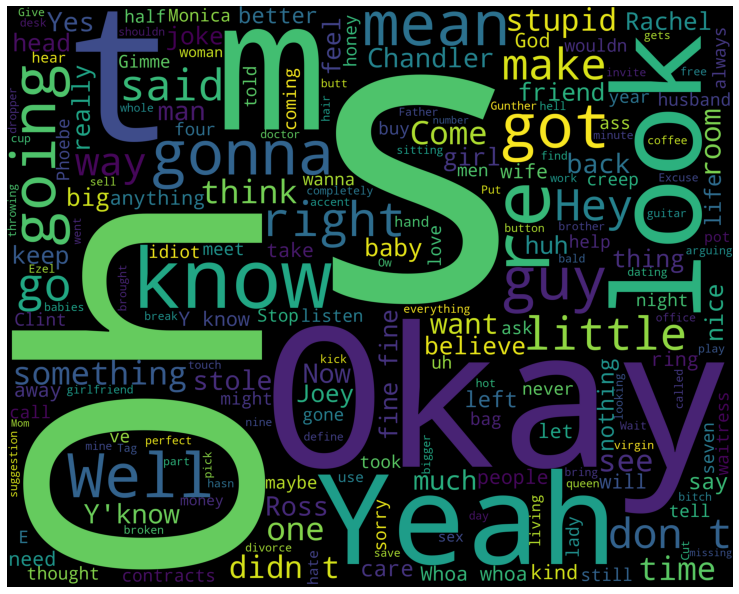

Disgust Emotion words


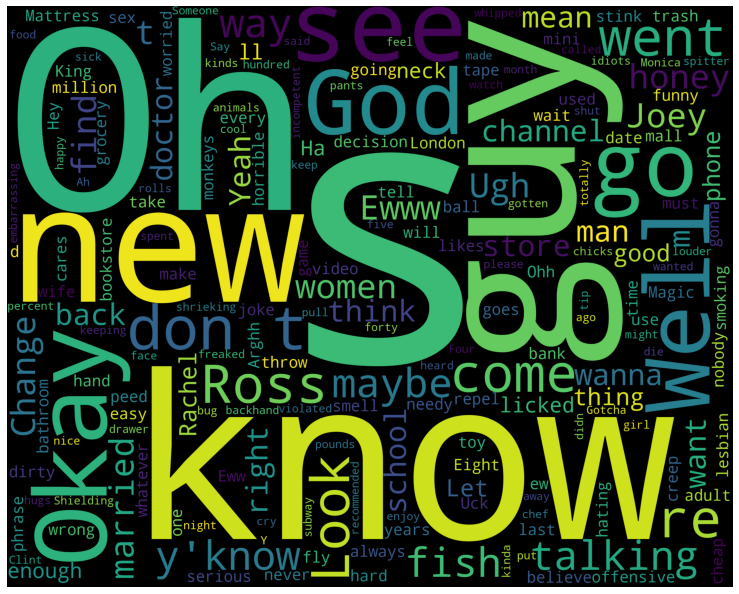

Fear Emotion words


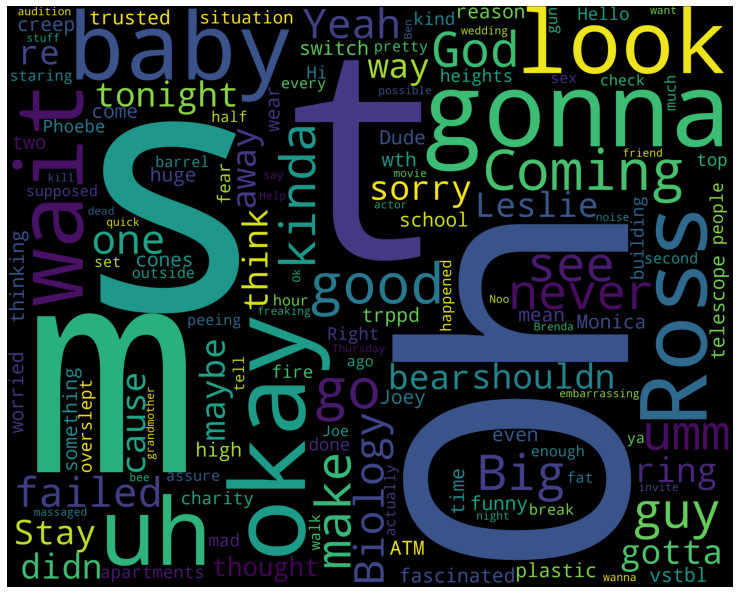

In [47]:
#Separate the Utterances of the training set in order to easily visualize their contained words using Emotions
train_sad = train_emo[ train_emo['Emotion'] == 'sadness']
train_sad = train_sad['Utterance']

train_sur = train_emo[ train_emo['Emotion'] == 'surprise']
train_sur = train_sur['Utterance']

train_joy = train_emo[ train_emo['Emotion'] == 'joy']
train_joy = train_joy['Utterance']

train_anger = train_emo[ train_emo['Emotion'] == 'anger']
train_anger = train_anger['Utterance']

train_disgust = train_emo[ train_emo['Emotion'] == 'disgust']
train_disgust = train_disgust['Utterance']

train_fear = train_emo[ train_emo['Emotion'] == 'fear']
train_fear = train_fear['Utterance']

def wordcloud_draw_emo(data_emo, color = 'black'):
    words = ' '.join(data_emo)
    cleaned_emo_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    emo_wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Joy Emotion words")
wordcloud_draw(train_joy,'white')

print("Sadness Emotion words")
wordcloud_draw(train_sad)

print("Surprise Emotion words")
wordcloud_draw(train_sur)

print("Anger Emotion words")
wordcloud_draw(train_anger)

print("Disgust Emotion words")
wordcloud_draw(train_disgust)

print("Fear Emotion words")
wordcloud_draw(train_fear)

In [48]:
emo_sentences = []
from nltk.corpus import stopwords
stopwords_set_emo = set(stopwords.words("english"))

for index, row in train_emo.iterrows():
    words_filtered_emo = [e.lower() for e in row.Utterance.split() if len(e) >= 3]
    words_cleaned_emo = [word for word in words_filtered_emo
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords_emo = [word for word in words_cleaned_emo if not word in stopwords_set_emo]
    emo_sentences.append((words_without_stopwords_emo, row.Emotion))

test_sad = test_emo[ test_emo['Emotion'] == 'sadness']
test_sad = test_sad['Utterance']

test_sur = test_emo[ test_emo['Emotion'] == 'surprise']
test_sur = test_sur['Utterance']

test_joy = test_emo[ test_emo['Emotion'] == 'joy']
test_joy = test_joy['Utterance']

test_anger = test_emo[ test_emo['Emotion'] == 'anger']
test_anger = test_anger['Utterance']

test_disgust = test_emo[ test_emo['Emotion'] == 'disgust']
test_disgust = test_disgust['Utterance']

test_fear = test_emo[ test_emo['Emotion'] == 'fear']
test_fear = test_fear['Utterance']

In [49]:
# extract the so called features with nltk lib, 
# first by measuring a frequent distribution and by selecting the resulting keys
# Extracting word features
def get_words_in_emo_sentences(emo_sentences):
    all = []
    for (words, Emotion) in emo_sentences:
        all.extend(words)
    return all

def get_word_features_emo(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features_emo = wordlist.keys()
    return features_emo      
                                 
w_features_emo = get_word_features_emo(get_words_in_emo_sentences(emo_sentences))

def extract_features_emo(document):
    document_words = set(document)
    features = {}
    for word in w_features_emo:
        features['contains(%s)' % word] = (word in document_words)
    return features

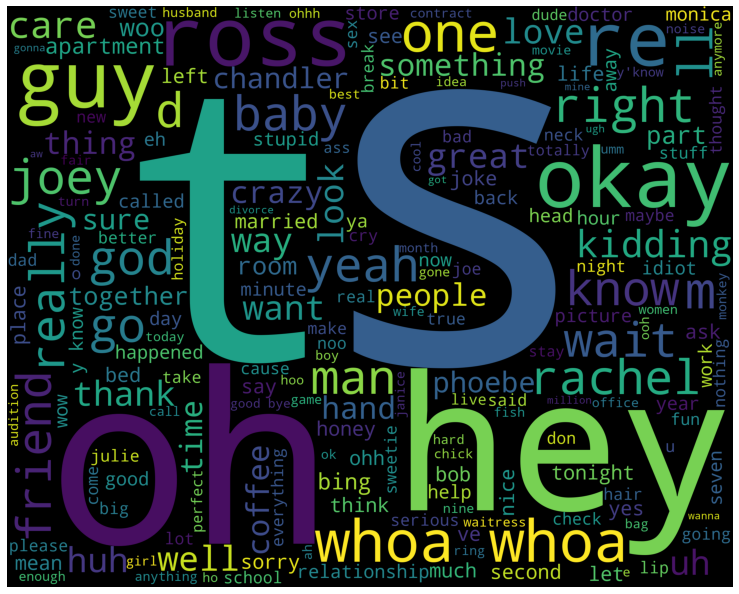

In [50]:
# plot the most frequently distributed words. The most words are centered around debate nights
wordcloud_draw(w_features_emo)

In [51]:
# Using the nltk NaiveBayes Classifier extract the sentance word features
# Training the Naive Bayes classifier
training_set_emo = nltk.classify.apply_features(extract_features_emo,sentences)
classifier_emo = nltk.NaiveBayesClassifier.train(training_set_emo)

In [56]:
# Finally, with not-so-intelligent metrics, this is a try to measure how the classifier algorithm scored
joy_cnt = 0
sad_cnt = 0
sur_cnt = 0
anger_cnt = 0
disgust_cnt = 0
fear_cnt = 0
for obj in test_joy: 
    res =  classifier_emo.classify(extract_features_emo(obj.split()))
    if(res == 'joy'): 
        joy_cnt = joy_cnt + 1
for obj in test_sad: 
    res =  classifier_emo.classify(extract_features_emo(obj.split()))
    if(res == 'sad'): 
        sad_cnt = sad_cnt + 1
for obj in test_sur: 
    res =  classifier_emo.classify(extract_features_emo(obj.split()))
    if(res == 'surprise'): 
        sur_cnt = sur_cnt + 1
for obj in test_anger: 
    res =  classifier_emo.classify(extract_features_emo(obj.split()))
    if(res == 'anger'): 
        anger_cnt = anger_cnt + 1
for obj in test_disgust: 
    res =  classifier_emo.classify(extract_features_emo(obj.split()))
    if(res == 'disgust'): 
        disgust_cnt = disgust_cnt + 1
for obj in test_fear: 
    res =  classifier_emo.classify(extract_features_emo(obj.split()))
    if(res == 'fear'): 
        fear_cnt = fear_cnt + 1
        
#print('[Joy]: %s/%s '  % (len(test_joy),joy_cnt))        
#print('[Sad]: %s/%s '  % (len(test_sad),sad_cnt))
#print('[Surprise]: %s/%s '  % (len(test_sur),sur_cnt))
#print('[Anger]: %s/%s '  % (len(test_anger),anger_cnt))
#print('[Disgust]: %s/%s '  % (len(test_disgust),disgust_cnt))
#print('[Fear]: %s/%s '  % (len(test_fear),fear_cnt))

print("TRAINED")
print("Joy Utterance example")
test_joy.head()

#print("Sadness Utterance example")
#test_sad.head()

#print("Surprise Utterance example")
#test_sur.head()

#print("Anger Utterance example")
#test_anger.head()

#print("Disgust Utterance example")
#test_disgust.head()

#print("Fear Utterance example")
#test_fear.head()


TRAINED
Joy Utterance example


1367    Hey! Oh listen, I was just clearing some space...
1079                                                Sure!
2586                              Oh, here’s a great one.
1008    Ooh, an ink stain! Hey, can I watch how you ge...
200                                                  Hey!
Name: Utterance, dtype: object

In [59]:
print("Sadness Utterance example")
test_sad.head()

Sadness Utterance example


1963                                     What is it? Hey!
258                                         Car accident.
477       Because she’s not gonna get to keep the babies.
1073    Hey, you guys. Listen, I’m sorry that I was ho...
1970    I’m just saying that y’know, someday Ross is g...
Name: Utterance, dtype: object